## Theory

- Linear regression is a supervised machine learning algorithm used to find a linear relationship between dependent(y) and one or more independent(x) features, when the target feature is of numeric data type.
- Objective of linear regression is to find a best fit line or coefficients of best fit line (m-slope & c-intercept) by reducing loss/cost/error function.

__Types of linear regression:__
   - Simple linear regression (one dependent and one independent feature) y=mx+c
   - Multiple linear regression (one dependent and more than one independent features) y=m1x1+m2x2+mnxn..+c

__Finding m & c values:__ To find the the best m and c values there are two methods:
   - Closed form solution (LinearRegression class in sklearn) uses OLS(Ordinary least square) method to find out the best coefficients of best fit line.
   - Non closed form solution (SGDRegressor class in sklearn) uses gradient descent algorithm to find out the coefficients of best fit line.

__Best fit line:__ is a line which passes through as many data points having minimum loss/cost/error function.

__Gradient descent algorithm__: is used to find coefficient of best fit line when we have high dimensional dataset. It will select random values for m & c and will iteratively keep updating values till it reaches the global minima point.

__Global minima point:__ is a point at which loss/cost/error function for a particular values of coefficients of best fit line will be minimum.

__Learning reate (alpha):__ will determine the size of steps that are taken by gradient descent. The value of alpha should be minimum because if it is large then it will not converge and will overshoots.
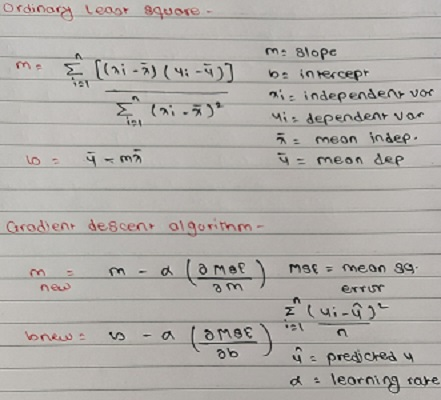

__Loss/Cost/Error functions in linear regression__ There are basically several loss/cost/error functions in linear regression based on their applications
   - MAE(Mean absolute error) 
   - MSE(Mean squared error)
   - RMSE(Root mean squared error)
   - R2 score
   - Adjusted R2 score

__MAE:__ Some of the disadvantages of MAE is that it is robust to outliers. The mean absolute error function is not differentiable at x = 0. MAE is used as a loss/cost/error function when the dataset consist of outliers.

__MSE:__ It is not robust to outliers, it penalizes the outliers. The mean squared error function is differentiable at all points.

__RMSE:__ It is nothing but square root of MSE.

## __Evaluation matrix__

__R2 score:__ R2 score is also known as coeficient of determination or goodness of fit. In simple words, it compares how better the linear regression line with mean line. The value of R2 score close to 1, more is the goodness of fit. The value of R2 score close to 0 worse is the goodness of fit. In some scenarios the value of R2 score can be -ve, when sum of squared error of regression line is greater than sum of squared errors by mean line or we can say (SSR>SSM). If the value of R2 score is 0.80 that means R2 score can explain 80% of variance of input features.

__Adjusted R2 score:__ Major disadvantage of R2 score is that the value of R2 score will never decrease it will either increase or be constant. On increasing number of features which are showing a good correlation with dependent feature will increase the R2 score but even if we add some unnecessary features for building model value of R2 score will never decrease. That's when the adjusted R2 score value come into the picture, It will penalize the model accuracy by decreasing the value of adjusted R2 score. We do not have a in build function to calculate Adjusted R2 score, we have to code manually to calculate adjusted R2 score.
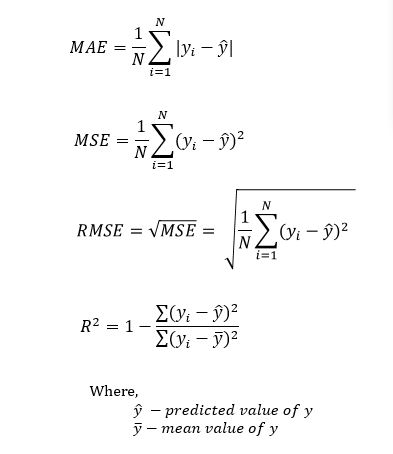

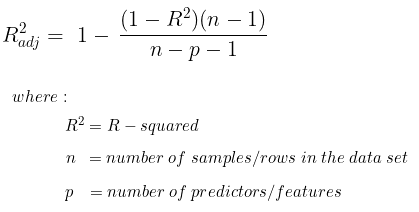

__Assumptions of linear regression__
1) `Linearity:` There should be linear relationship between dependent and independent features.

2) `No multicollinearity:` There should not be any linear relationship between two or more independent features.

3) `Normality of residuals:` Residuals(Yactual-Ypredicted) should follow guassian normal distribution.

4) `Homoscedasticity:` Residuals(Yactual-Ypredicted) should have constant variance at every level of X. If there is no constant variance then it will be the case of heteroscedasticity where the accuracy of the model is hard to trust.

__Linearity__
- How to check linearity?
  - Coeficient of correlation (Pearson's coefficient of correlation used when there is linear data for non linear data Spearman's coeffiecient of correlation is used) 
  - By plotting scatter plot between two features
  - Using correlation matrix
- How to handel linearity, if gets voiated?
  - Apply non linear transformation on dependent and/or independent feature such as
    - Log transformation (np.log(df[]))
    - Square root transformation (np.sqrt(df[]))
    - Reciprocal transformation (1/df[])
    
__Coefficient of correlaton (r)__    
-  Range of coefficient of correlaton(r) is between -1 to 1. Values of r closer to 1 and -1 shows a good correlation whereas values of r closer to 0 shows bad correlation. When r equals to 1 or -1 then it is a case of perfect correlation. If the value of r equals to 0 then there is no correlation.
- If the value of x increases with the increase in value of y then there is a positive correlation. If the value of x decreases with the decrease in the value of y then it is negative correlation.
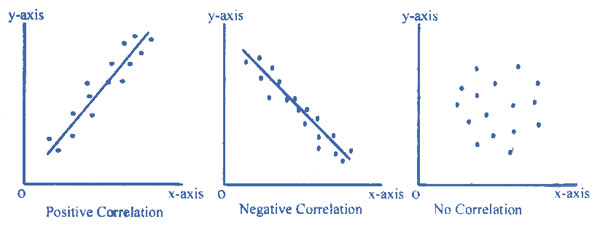

__No multicollinearity__
- How to check multicollinearity?
  - Using VIF(Variance inflation factor) score
  - By plotting scatter plot
  - Using correlation matrix
- How to handle multicollinearity, if gets voilated?
  - We can either drop features having linear relationship with dependent feature or combine two or more features together to create a new feature.
  
__Variance inflation factor (VIF)__  
- VIF(variance inflation factor) is a measurement with which we can know, which all independent features are highly correlated with other independent feature. The actual range of VIF is 1 to infinity whereas the ideal range of VIF is 1 to 10. In simple words VIF score represents how well the independent variable is correlated by other independent variable.
  - VIF = 1 (no correlation)
  - VIF = 1-5 (moderate correlation)
  - VIF > 10 (strong correlation)
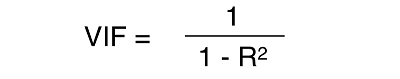

__Normality of residuals__
- How to check Normality of residual? 
  - There are basically two ways to check normality of residuals by using graphical method or by using statistical methods
    - Graphical method
      - Distribution curv(kde plot, dist plot)
    - Statistical methods (Hypothesis testing)
      - Shapiro-Wilk test
      - Kolmogorov test
      - D'Agostino's KS test
- How to handle Normality of residual, if gets voilated?
  - Remove outliers
  - Apply non linear transformation on dependent and/or independent feature such as
    - Log transformation (np.log(df[]))
    - Square root transformation (np.sqrt(df[]))
    - Reciprocal transformation (1/df[])
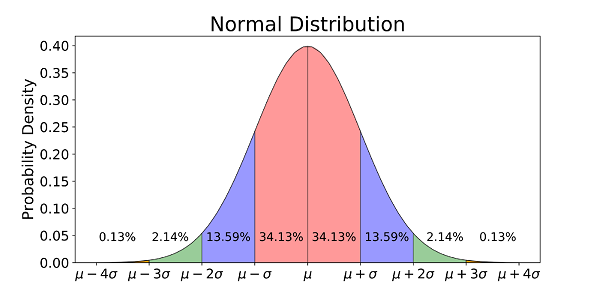

__Homoscedasticity__
- How to check Normality of residual?
  - Plotting a scatter plot between fitted actual values(Yactual) and residuals
- How to handle Normality of residual, if gets voilated?
  - Transforming dependent feature using log transformation
  - Redefine the dependent feature
  - Use weighted regression which assigns a weight to each data points based on the variance of it's fitted value.

In [ ]:
# Heteroscedasticity

## Practical

In [1]:
# Creating our own class for linear regression algorithm:
class MeraLR:
    def __init__(self):
        self.m = None
        self.b = None 
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    def predict(self,X_test):
        print(X_test)
        return self.m * X_test + self.b

In [2]:
# Computational libraries
import numpy as np
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split

# Importing model
from sklearn.linear_model import LinearRegression, SGDRegressor

# Evaluation matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Creating a dataframe form toy dataset
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Assumptions
# 1) Linearity
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


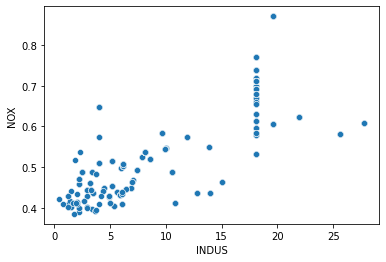

In [5]:
sns.scatterplot(x='INDUS',y='NOX',data=df)
plt.show()

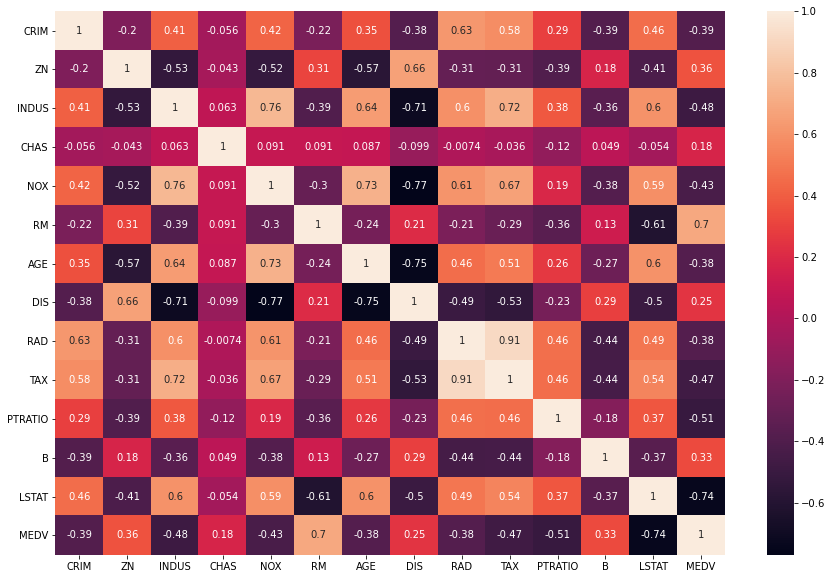

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

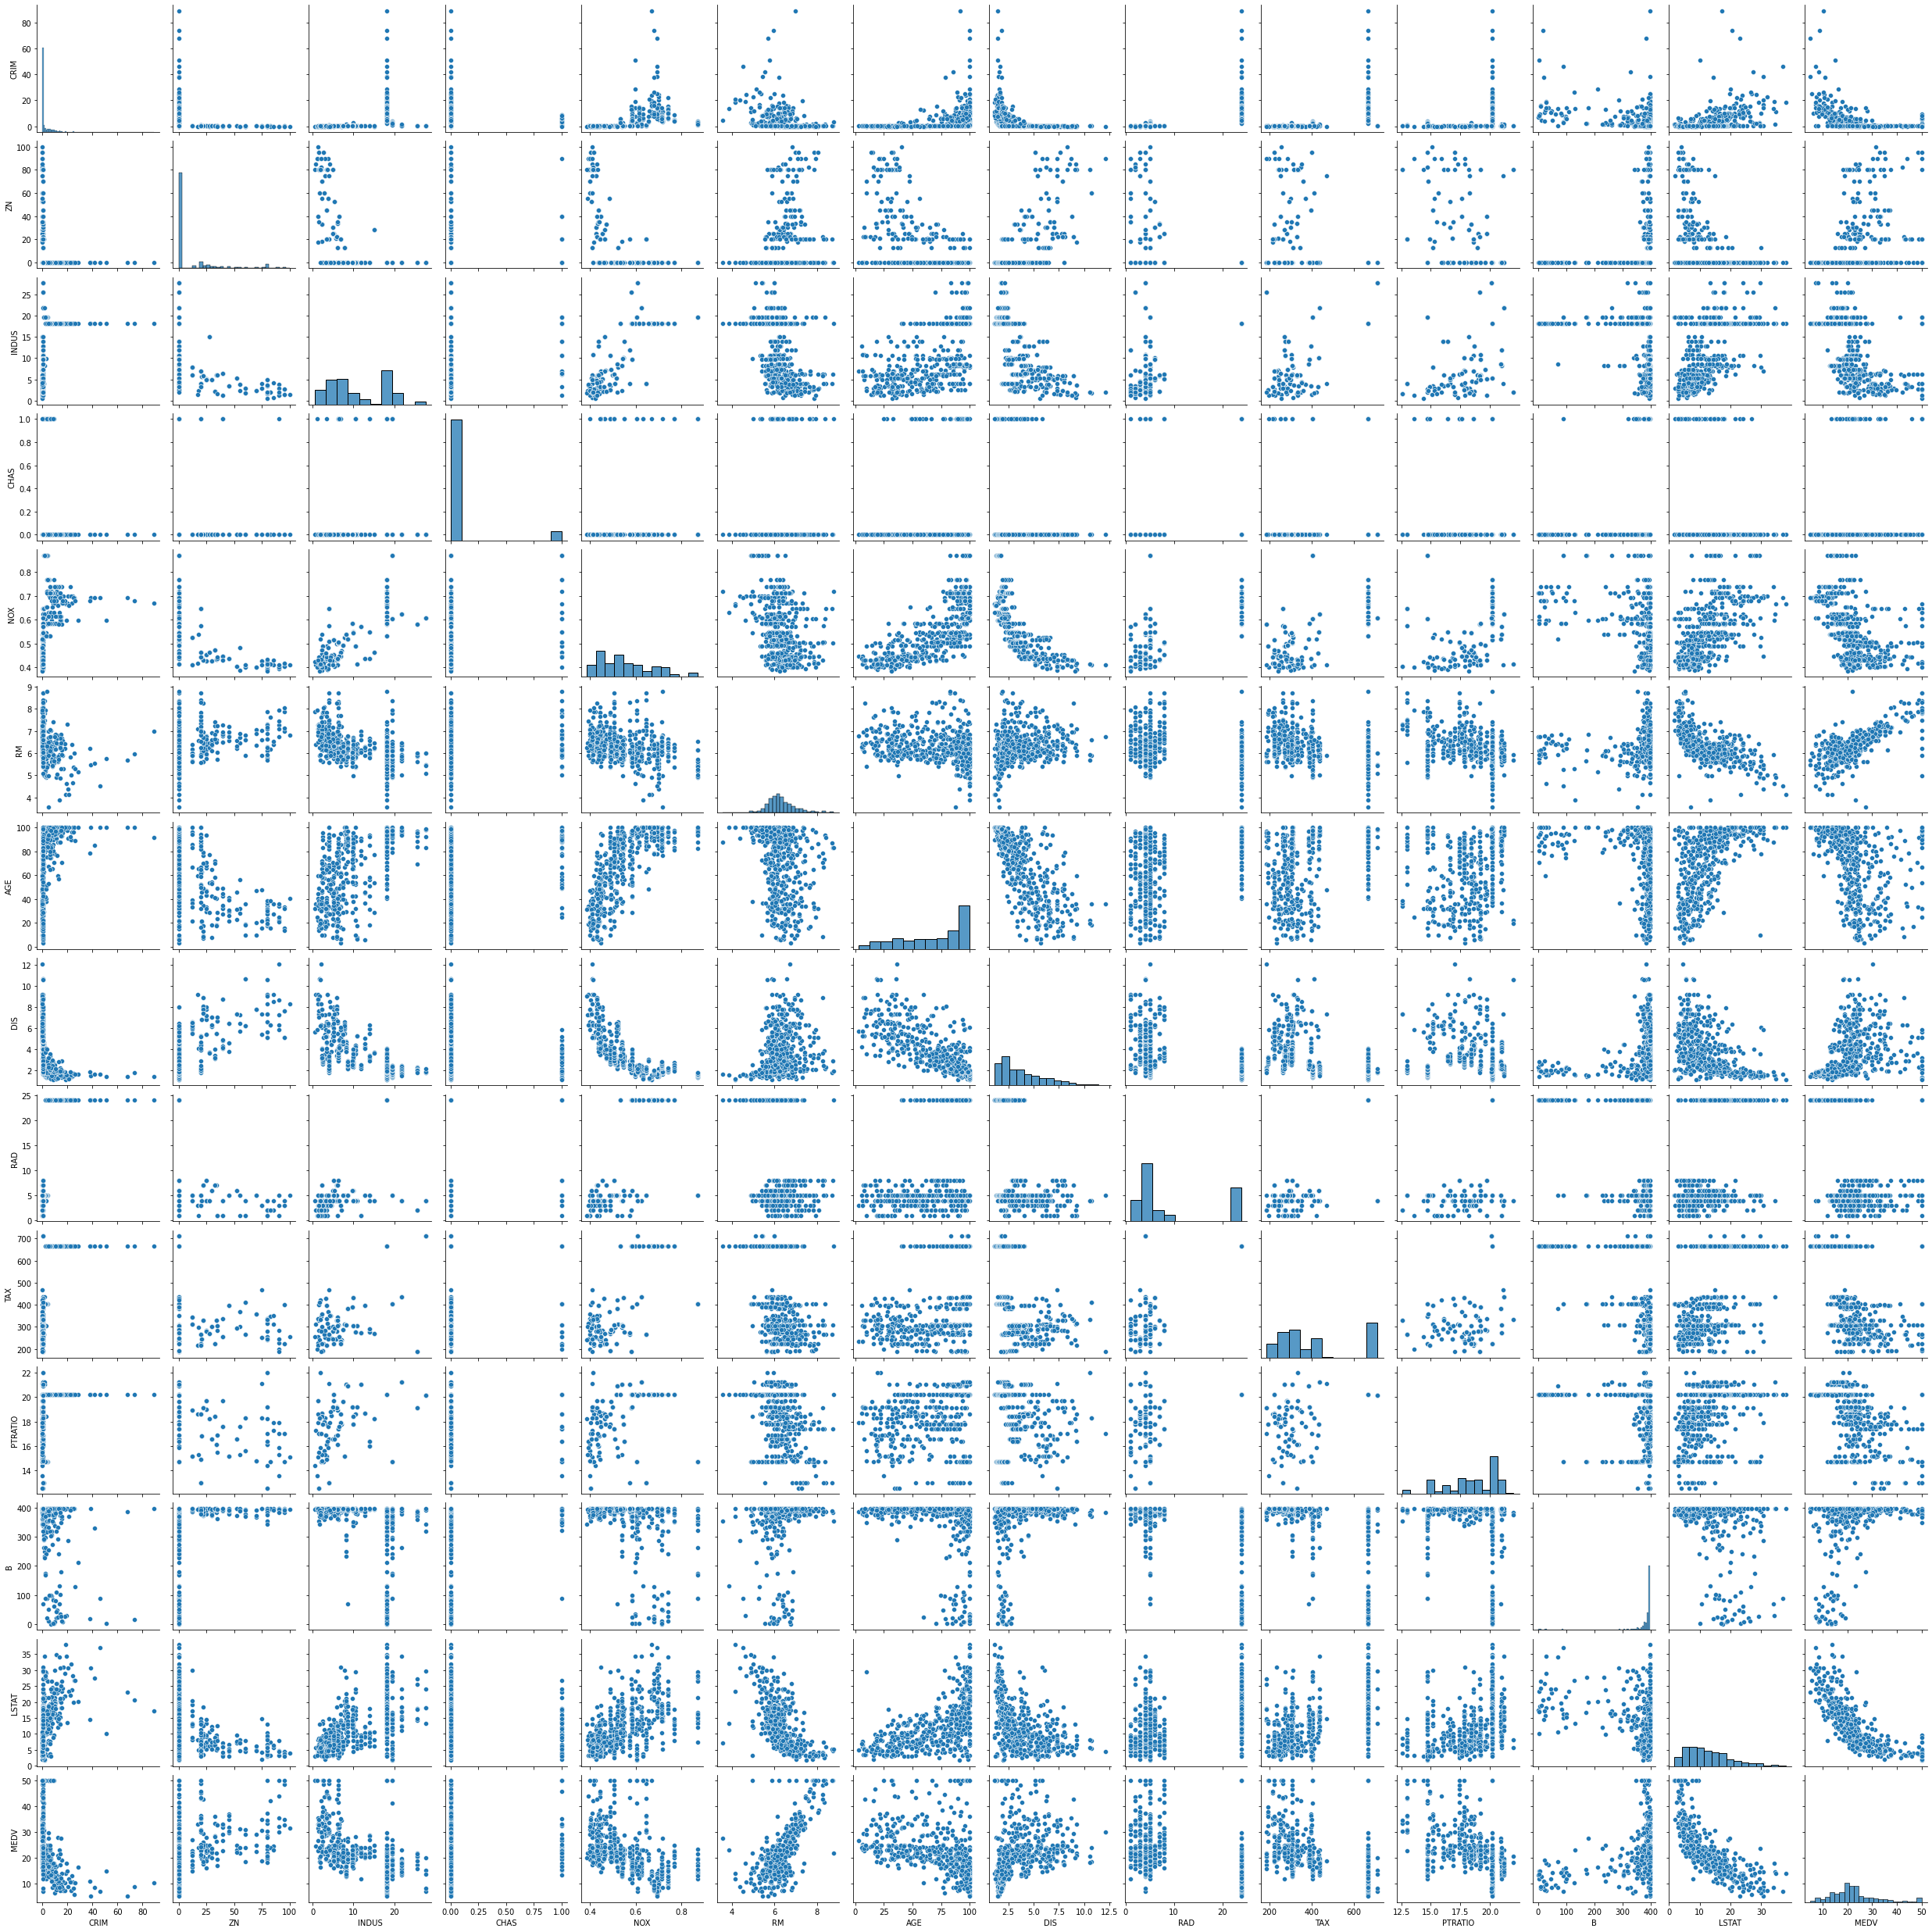

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
# 2) No multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
df1 = df
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)
vif_df['VIF'] = vif_list
vif_df

,Features,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


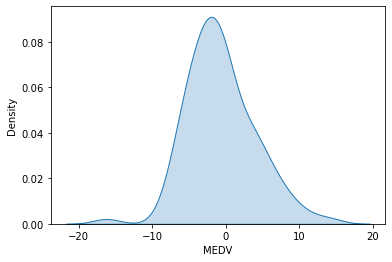

In [22]:
# 3) Normality of residuals
residuals_test = y_test-y_pred_test
sns.kdeplot(residuals_test,fill=True)
plt.show()

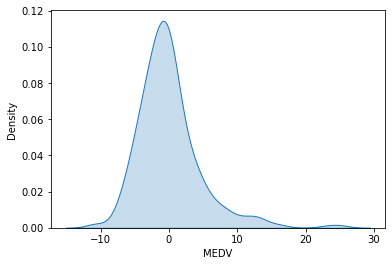

In [23]:
residuals_train = y_train-y_pred_train
sns.kdeplot(residuals_train,fill=True)
plt.show()

In [24]:
# Hypothesis testing [KS test]- residuals train
from scipy.stats import kstest
_, p_val = kstest(residuals_train, 'norm')
print('P value is', p_val)

if p_val >= 0.05:
    print('Null Hypothesis is True, Data is normally distributed')
    
else:
    print("Alternate Hypothesis is True, Data is not normally distributed")

P value is 4.218978572400369e-39
Alternate Hypothesis is True, Data is not normally distributed


In [25]:
# Hypothesis testing [KS test]- residuals test
_, p_val = kstest(residuals_test, 'norm')
print('P value is', p_val)

if p_val >= 0.05:
    print('Null Hypothesis is True, Data is normally distributed')
    
else:
    print("Alternate Hypothesis is True, Data is not normally distributed")

P value is 3.804715113793533e-18
Alternate Hypothesis is True, Data is not normally distributed


In [26]:
# Hypothesis testing [Normal test]- residuals train
from scipy.stats import normaltest
_, p_val = normaltest(residuals_train)
print('P value is', p_val)

if p_val >= 0.05:
    print('Null Hypothesis is True, Data is normally distributed')
    
else:
    print("Alternate Hypothesis is True, Data is not normally distributed")

P value is 6.582395504064041e-35
Alternate Hypothesis is True, Data is not normally distributed


In [27]:
# Hypothesis testing [Normal test]- residuals test
_, p_val = normaltest(residuals_test)
print('P value is', p_val)

if p_val >= 0.05:
    print('Null Hypothesis is True, Data is normally distributed')
    
else:
    print("Alternate Hypothesis is True, Data is not normally distributed")

P value is 0.035968689957771666
Alternate Hypothesis is True, Data is not normally distributed


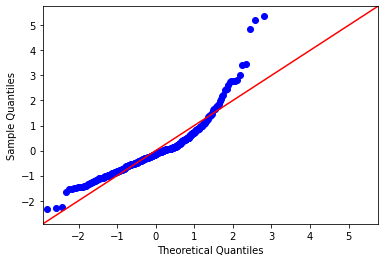

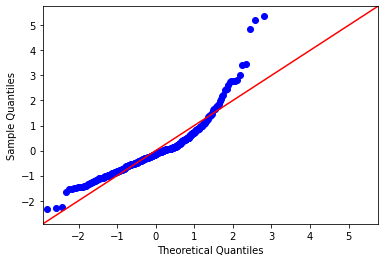

In [28]:
# QQ plot- residuals train
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(residuals_train, line = '45', fit = True)

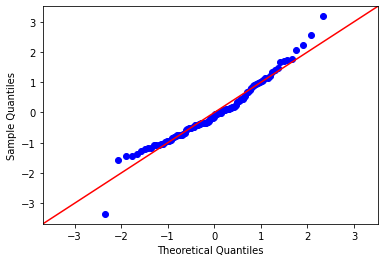

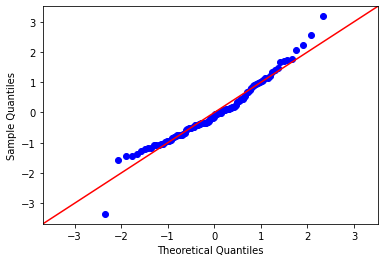

In [29]:
# QQ plot- reiduals test
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(residuals_test, line = '45', fit = True)

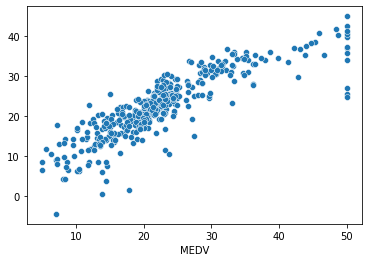

In [30]:
# Homoscedasticity- residuals train
sns.scatterplot(x=y_train,y=y_pred_train)
plt.show()

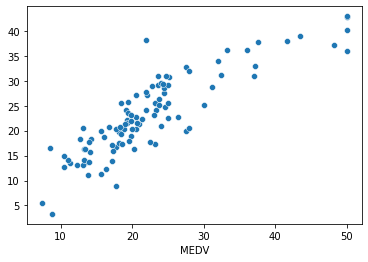

In [31]:
# Homoscedasticity- residuals test
sns.scatterplot(x=y_test,y=y_pred_test)
plt.show()

In [32]:
x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [33]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [34]:
# Creating an object of model
lr = LinearRegression()

In [35]:
# Fit model
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
# Slope of BFL
lr.coef_

array([-1.02096701e-01,  4.65119270e-02,  1.49684450e-02,  3.30336317e+00,
       -1.97258917e+01,  3.64434550e+00,  4.96665387e-03, -1.51069734e+00,
        2.76148399e-01, -9.88072653e-03, -8.90677867e-01,  9.62981073e-03,
       -5.58956664e-01])

In [37]:
# Intercept of BFL
lr.intercept_

37.013143346424684

In [38]:
n_train = x_train.shape[0]
p_train = x_train.shape[1]

In [19]:
# Training accuracy
y_pred_train = lr.predict(x_train)

mae_train = mean_absolute_error(y_train,y_pred_train)
print(f'The mean absolute error for training is {mae_train}')

mse_train = mean_squared_error(y_train,y_pred_train)
print(f'The mean squared error for training is {mse_train}')

rmse_train = np.sqrt(mse_train)
print(f'The root mean squared error for training is {rmse_train}')

r2_score_train = r2_score(y_train,y_pred_train)
print(f'The r2 score for training is {r2_score_train}')

adj_r2_train = 1 - ((1-r2_score_train)*(n_train-1)/(n_train-1-p_train))
print(f'The adjusted r2 score for training is {adj_r2_train}')

The mean absolute error for training is 3.2401759872172295
The mean squared error for training is 22.021884616145638
The root mean squared error for training is 4.6927480878634045
The r2 score for training is 0.7377734707180098
The adjusted r2 score for training is 0.7290325864086101


In [20]:
n_test = x_test.shape[0]
p_test = x_test.shape[1]

In [21]:
# Testing accuracy
y_pred_test = lr.predict(x_test)

mae_test = mean_absolute_error(y_test,y_pred_test)
print(f'The mean absolute error for testing is {mae_test}')

mse_test = mean_squared_error(y_test,y_pred_test)
print(f'The mean squared error for testing is {mse_test}')

rmse_test = np.sqrt(mse_test)
print(f'The root mean squared error for testing is {rmse_test}')

r2_score_test = r2_score(y_test,y_pred_test)
print(f'The r2 score for testing is {r2_score_test}')

adj_r2_test = 1 - ((1-r2_score_test)*(n_test-1)/(n_test-1-p_test))
print(f'The adjusted r2 score for testing is {adj_r2_test}')

The mean absolute error for testing is 3.66898867107847
The mean squared error for testing is 21.953471731537057
The root mean squared error for testing is 4.685453204497624
The r2 score for testing is 0.7451430642919576
The adjusted r2 score for testing is 0.7074937442441787


In [2]:
# Creating a dataframe form toy dataset
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
df

C:\Users\MY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

NameError: name 'pd' is not defined